In [1]:
! pip install seaborn

In [2]:
! pip install matplotlib

In [3]:
! pip install scikit-learn

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [6]:
df = pd.read_csv("Weather_Data.csv")

In [7]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

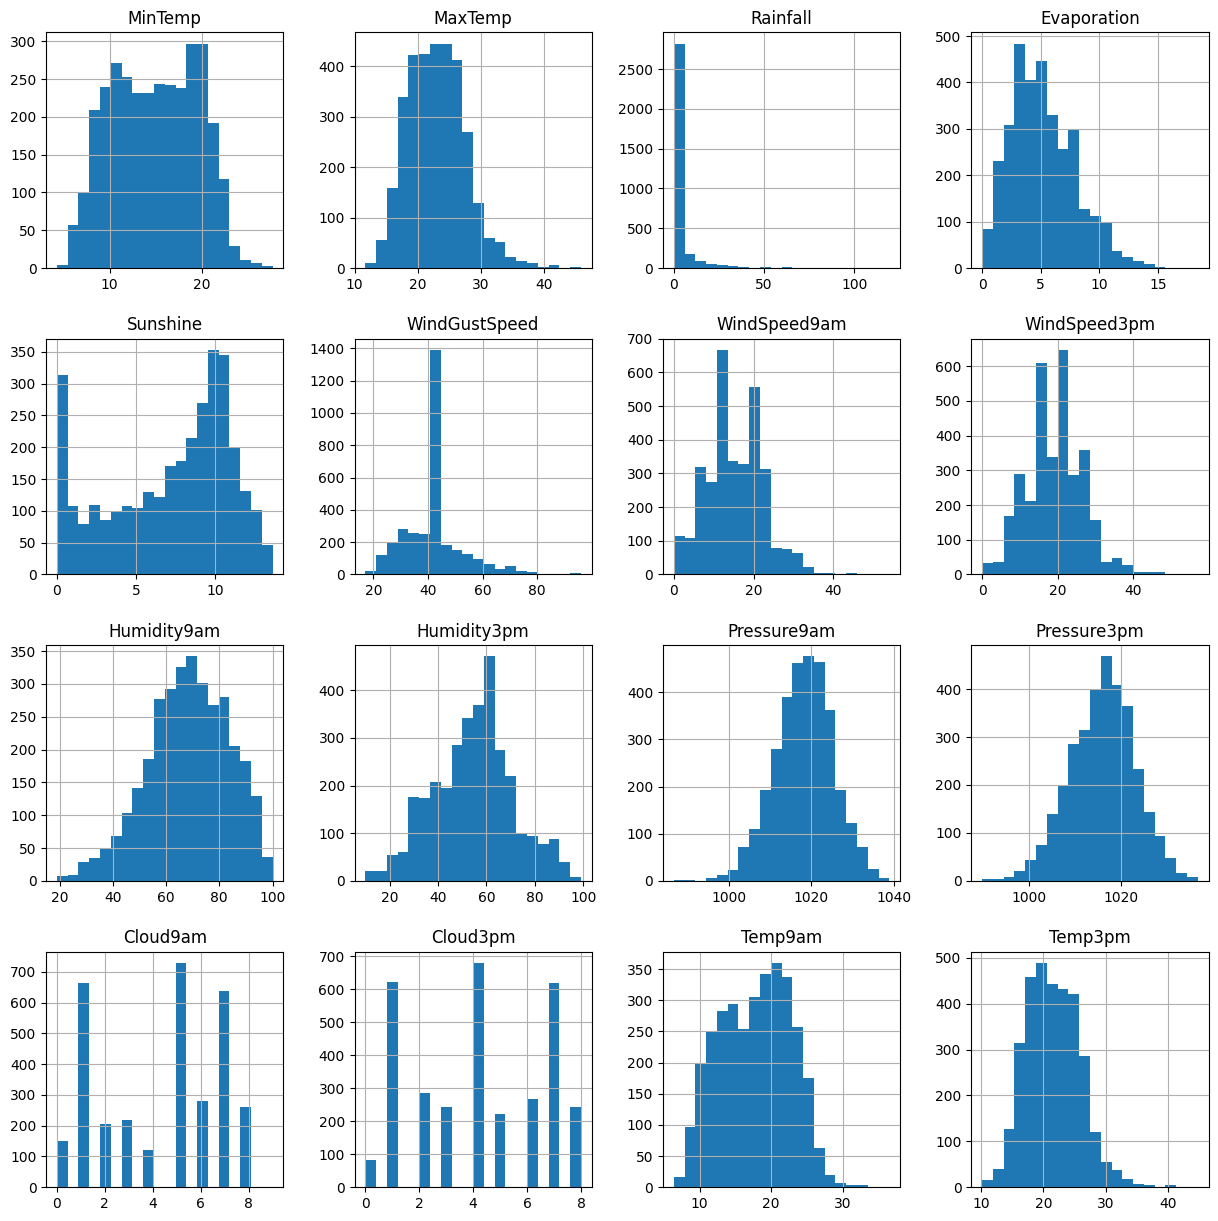

In [9]:
df.hist(bins = 20, figsize = (15,15))
plt.show()

In [10]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [11]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [12]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [18]:
df_sydney_processed = df_sydney_processed.astype(float)

In [19]:
df_sydney_processed.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
                   ...   
WindDir3pm_SSW    float64
WindDir3pm_SW     float64
WindDir3pm_W      float64
WindDir3pm_WNW    float64
WindDir3pm_WSW    float64
Length: 67, dtype: object

In [20]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [16]:
features.info

<bound method DataFrame.info of       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        19.5     22.4      15.6          6.2       0.0           41.0   
1        19.5     25.6       6.0          3.4       2.7           41.0   
2        21.6     24.5       6.6          2.4       0.1           41.0   
3        20.2     22.8      18.8          2.2       0.0           41.0   
4        19.7     25.7      77.4          4.8       0.0           41.0   
...       ...      ...       ...          ...       ...            ...   
3266      8.6     19.6       0.0          2.0       7.8           37.0   
3267      9.3     19.2       0.0          2.0       9.2           30.0   
3268      9.4     17.7       0.0          2.4       2.7           24.0   
3269     10.1     19.3       0.0          1.4       9.3           43.0   
3270      7.6     19.3       0.0          3.4       9.4           35.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           

In [17]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: RainTomorrow, dtype: float64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [19]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [20]:
train_predictions_LinearReg = LinearReg.predict(x_train)
predictions_LinearReg = LinearReg.predict(x_test)

In [21]:
threshold = 0.5
binary_train_predictions = (train_predictions_LinearReg > threshold).astype(int)
binary_test_predictions = (predictions_LinearReg > threshold).astype(int)

In [22]:
train_accuracy = accuracy_score(y_train, binary_train_predictions)
test_accuracy = accuracy_score(y_test, binary_test_predictions)

In [23]:
print(f"Training data accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing data accuracy: {test_accuracy * 100:.2f}%")

Training data accuracy: 84.37%
Testing data accuracy: 83.66%


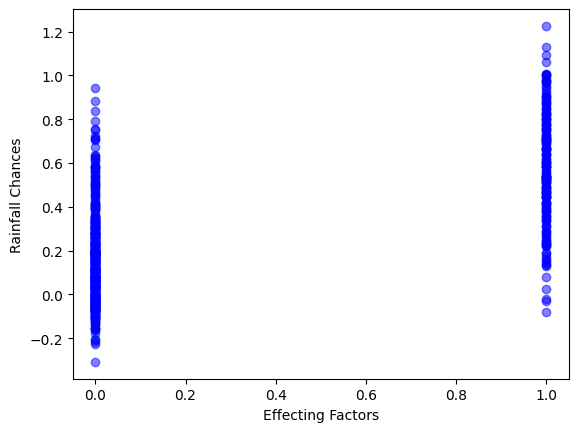

In [24]:
plt.scatter(y_test, predictions_LinearReg, color='blue', alpha=0.5)
plt.xlabel('Effecting Factors')
plt.ylabel('Rainfall Chances')
plt.show()

In [25]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions_LinearReg)
LinearRegression_MSE = mean_squared_error(y_test, predictions_LinearReg)
LinearRegression_R2 = r2_score(y_test, predictions_LinearReg)

In [26]:
Report = pd.DataFrame({'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R2)'],
                       'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]})
print(Report)

                      Metric     Value
0  Mean Absolute Error (MAE)  0.256316
1   Mean Squared Error (MSE)  0.115720
2             R-squared (R2)  0.427134


In [27]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

In [28]:
train_predictions_KNN = KNN.predict(x_train)
predictions_KNN = KNN.predict(x_test)

In [29]:
threshold = 0.5
binary_train_predictions = (train_predictions_KNN > threshold).astype(int)
binary_test_predictions = (predictions_KNN > threshold).astype(int)

In [30]:
train_accuracy = accuracy_score(y_train, binary_train_predictions)
test_accuracy = accuracy_score(y_test, binary_test_predictions)

In [31]:
print(f"Training data accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing data accuracy: {test_accuracy * 100:.2f}%")

Training data accuracy: 85.82%
Testing data accuracy: 81.83%


Text(0, 0.5, 'Rainfall Chances')

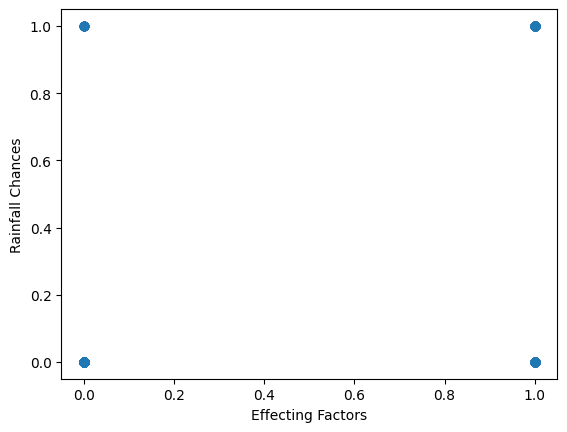

In [32]:
plt.scatter(y_test, predictions_KNN)
plt.xlabel('Effecting Factors')
plt.ylabel('Rainfall Chances')

In [33]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions_KNN)
KNN_JaccardIndex = jaccard_score(y_test, predictions_KNN)
KNN_F1_Score = f1_score(y_test, predictions_KNN)

In [34]:
Tree = DecisionTreeRegressor().fit(x_train, y_train)
Tree

DecisionTreeRegressor()

In [35]:
train_predictions_Tree = Tree.predict(x_train)
predictions_Tree = Tree.predict(x_test)

In [36]:
threshold = 0.5
binary_train_predictions = (train_predictions_Tree > threshold).astype(int)
binary_test_predictions = (predictions_Tree > threshold).astype(int)

In [37]:
train_accuracy = accuracy_score(y_train, binary_train_predictions)
test_accuracy = accuracy_score(y_test, binary_test_predictions)

In [38]:
print(f"Training data accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing data accuracy: {test_accuracy * 100:.2f}%")

Training data accuracy: 100.00%
Testing data accuracy: 75.73%


Text(0, 0.5, 'Rainfall Chances')

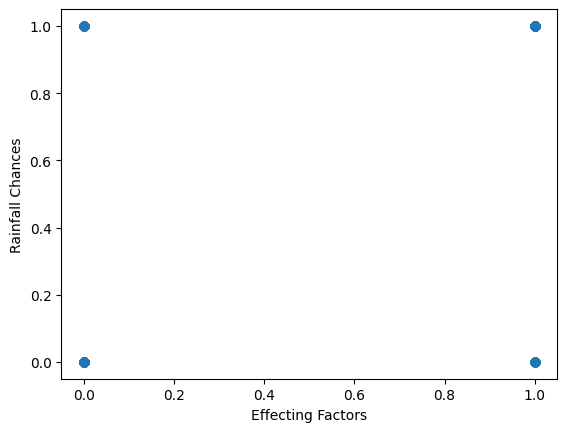

In [39]:
plt.scatter(y_test, predictions_Tree)
plt.xlabel('Effecting Factors')
plt.ylabel('Rainfall Chances')

In [40]:
Tree_MAE = mean_absolute_error(y_test, predictions_Tree)
Tree_MSE = mean_squared_error(y_test, predictions_Tree)
Tree_R2 = r2_score(y_test, predictions_Tree)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [42]:
LR = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [43]:
predictions_LR = LR.predict(x_test)

In [44]:
predict_proba = LR.predict_proba(x_test)

In [45]:
LogisticRegression_Accuracy_Score = accuracy_score(y_test, predictions_LR)
LogisticRegression_JaccardIndex = jaccard_score(y_test, predictions_LR)
LogisticRegression_F1_Score = f1_score(y_test, predictions_LR)
LogisticRegression_Log_Loss = log_loss(y_test, predict_proba)

In [46]:
SVM = SVC().fit(x_train, y_train)

In [47]:
predictions_SVM = SVM.predict(x_test)

In [48]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions_SVM) 
SVM_JaccardIndex = jaccard_score(y_test, predictions_SVM)
SVM_F1_Score = f1_score(y_test, predictions_SVM)

In [49]:
Report = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'SVM'],
                       'Accuracy Score': [KNN_Accuracy_Score, LogisticRegression_Accuracy_Score, SVM_Accuracy_Score],
                       'Jaccard Index': [KNN_JaccardIndex, LogisticRegression_JaccardIndex, SVM_JaccardIndex],
                       'F1 Score': [KNN_F1_Score, LogisticRegression_F1_Score, SVM_F1_Score],
                       'Log Loss': [None, LogisticRegression_Log_Loss, None]})
print(Report)

                 Model  Accuracy Score  Jaccard Index  F1 Score  Log Loss
0                  KNN        0.818321       0.425121  0.596610       NaN
1  Logistic Regression        0.835115       0.504587  0.670732  0.381592
2                  SVM        0.722137       0.000000  0.000000       NaN


In [50]:
Report = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree'],
                       'Mean Absolute Error': [LinearRegression_MAE, Tree_MAE],
                       'Mean Squared Error':[LinearRegression_MSE, Tree_MSE],
                       'R-Squared Error':[LinearRegression_R2, Tree_R2], 
                       'Log Loss': [None, None]})
print(Report)

               Model  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression             0.256316            0.115720   
1      Decision Tree             0.242748            0.242748   

   R-Squared Error Log Loss  
0         0.427134     None  
1        -0.201710     None  
